> This work is done to answers the case based on Revou Mini Course for Data Analytics (Batch 26 December 2023 - 5 January 2024).

# Import Essentials

## Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [2]:
url = 'https://docs.google.com/spreadsheets/d/1z46qH9il8OfVkYBZMMDUYq_GYHp77_prgkKq6HysZts/edit#gid=1485085913'
url = url.replace('/edit#gid=', '/export?format=csv&gid=')

In [3]:
df = pd.read_csv(url)
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic


# Data Preparation

## Data Introduction

In [4]:
df.shape

(177, 7)

> This dataset has 177 rows with 7 columns each.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       177 non-null    object 
 1   Sales      177 non-null    float64
 2   Series     141 non-null    object 
 3   Release    177 non-null    object 
 4   Genre      177 non-null    object 
 5   Developer  177 non-null    object 
 6   Publisher  177 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.8+ KB


> Based on this information, it can be concluded that there are missing values since this dataset is not all equal by count. Even though it is necessary to check the categorical variables for any mistyped values, given the extensive variety of categorical variables in this dataset, it is impractical to manually check for typographical errors. Therefore, this step will be omitted. Additionally, based on the column names, there is a column that does not match its name.

## Match Data Type

In [6]:
df['Release'] = pd.to_datetime(df['Release'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       177 non-null    object        
 1   Sales      177 non-null    float64       
 2   Series     141 non-null    object        
 3   Release    177 non-null    datetime64[ns]
 4   Genre      177 non-null    object        
 5   Developer  177 non-null    object        
 6   Publisher  177 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 9.8+ KB


> This action need to be done so that fewer settings will be required when uploading this data to any dashboard.

## Handling Missing Value

> There are multiple ways to handle missing value. One of the simplest way is to remove those rows where one or more of its values are missing, or use the mean of the column if it is a numerical column and the mode of the column if it is a categorical column. Methods such as KNNImputer can also be employed.

> However, before proceeding to handle this missing value, it is better to look further on this column for more detail.

In [7]:
df[df['Series']=='Diablo']

,Name,Sales,Series,Release,Genre,Developer,Publisher
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
29,Diablo II,4.0,Diablo,2000-06-01,Action role-playing,Blizzard North,Blizzard Entertainment
66,Diablo,2.0,Diablo,1996-12-01,Action role-playing,Blizzard North,Blizzard Entertainment (North America)


> Turns out, the null values in Series column are intentionally null. This intrepretates that those games do not have any series. Therefore, to prevent any misunderstanding in the future event, it is better to replace the null values as "-".

In [8]:
df = df.fillna('-')
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,-,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,-,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,-,2011-05-01,Action-adventure,Re-Logic,Re-Logic


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       177 non-null    object        
 1   Sales      177 non-null    float64       
 2   Series     177 non-null    object        
 3   Release    177 non-null    datetime64[ns]
 4   Genre      177 non-null    object        
 5   Developer  177 non-null    object        
 6   Publisher  177 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 9.8+ KB


# Exploratory Data Analysis (EDA)

In [10]:
def visualize(df, x, y, z, title, type):
  plt.figure(figsize=(20, 5))
  if (type == 'line'):
    plt.plot(x, y, data=df, marker='o')
  elif (type == 'bar'):
    df = df.sort_values(y, ascending=True).head(min(df[x].nunique(), 10))
    plt.bar(x, y, data=df.sort_values(y, ascending=False))
  elif (type == 'grouped-bar'):
    df = df.sort_values(y, ascending=True)
    sns.barplot(x=x, y=y, hue=z, data=df)
  else:
    df = df.sort_values(y, ascending=True).head(min(df[x].nunique(), 10))
    plt.pie(df[y], labels=df[x], autopct='%.2lf%%')
  plt.title(title)
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()

## Daily Trend

> This shows daily trend as the sum of Sales each year, sorted by Date.

In [11]:
eda_trend = df.groupby('Release', as_index=False).agg({'Sales' : 'sum'})
eda_trend.head()

,Release,Sales
0,1984-12-01,1.0
1,1985-06-01,4.0
2,1985-11-01,1.5
3,1988-01-01,1.0
4,1988-08-01,5.5


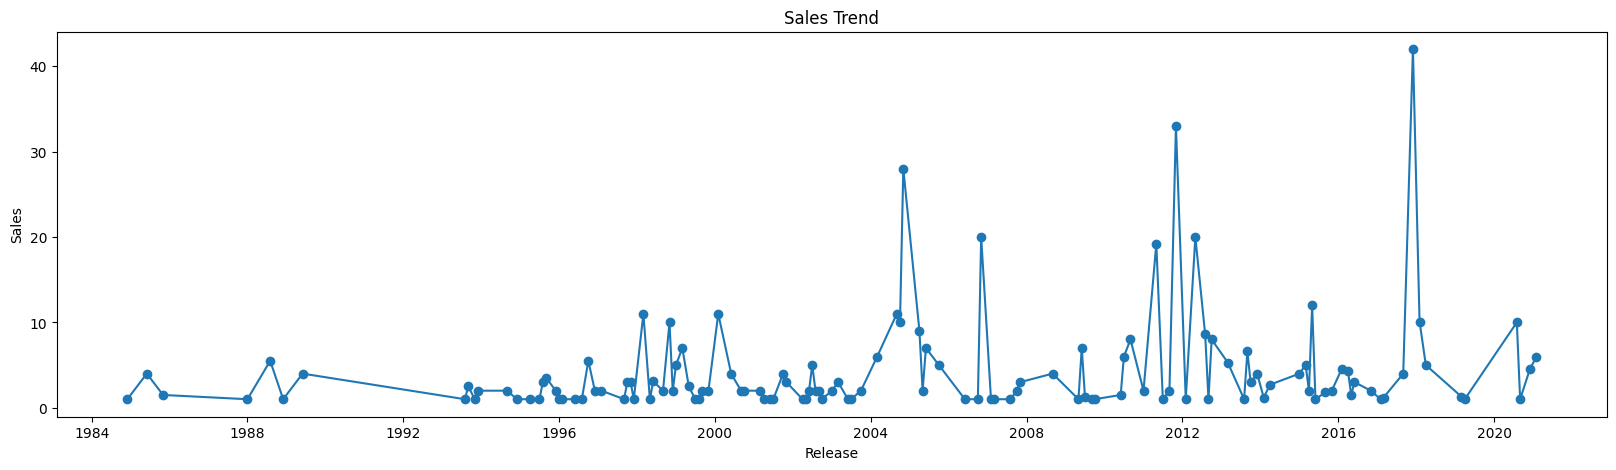

In [12]:
visualize(eda_trend, 'Release', 'Sales', '', 'Sales Trend', 'line')

> Based on this information, it can be concluded that the highest Sales is achieved on 2017 and the lowest Sales is achieved on several years.

## Sales

### Sales by Series

In [13]:
eda_series = df.groupby('Series', as_index=False).agg({'Sales' : 'sum'})
eda_series.head()

,Series,Sales
0,-,156.1
1,7 Days,2.0
2,ARMA,5.5
3,Age of Empires,8.0
4,Alice,1.0


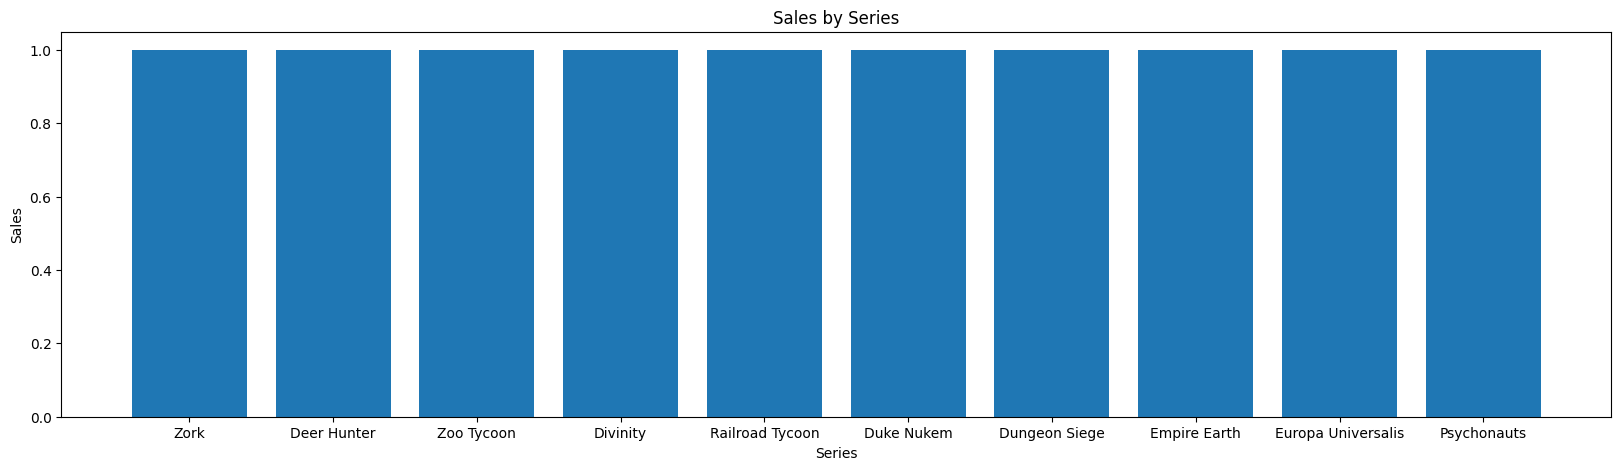

In [14]:
visualize(eda_series, 'Series', 'Sales', '', 'Sales by Series', 'bar')

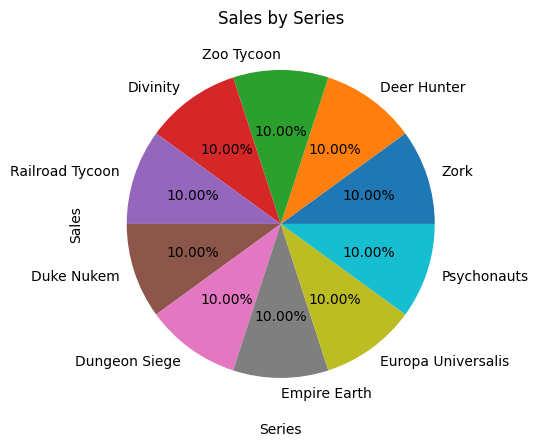

In [15]:
visualize(eda_series, 'Series', 'Sales', '', 'Sales by Series', 'pie')

> Based on this information, it can be concluded that the series with the highest sales are several.

### Sales by Genre

In [16]:
eda_genre = df.groupby('Genre', as_index=False).agg({'Sales' : 'sum'})
eda_genre.head()

,Genre,Sales
0,Action,4.0
1,Action role-playing,58.1
2,Action role-playing game,1.1
3,"Action role-playing, hack and slash",1.2
4,Action-adventure,31.7


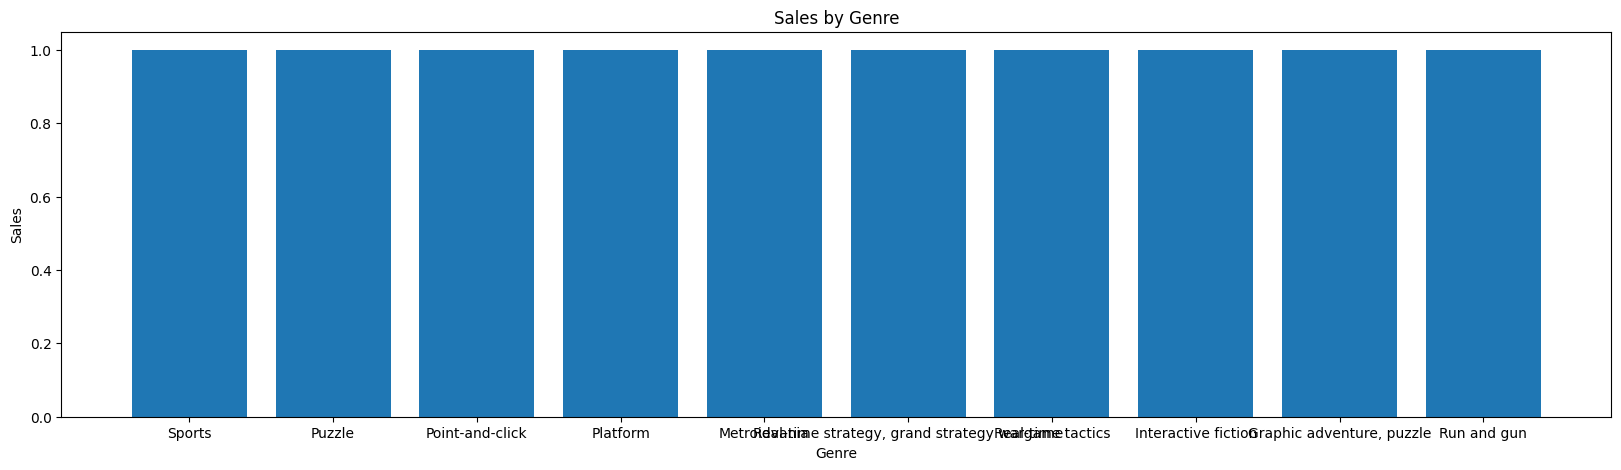

In [17]:
visualize(eda_genre, 'Genre', 'Sales', '', 'Sales by Genre', 'bar')

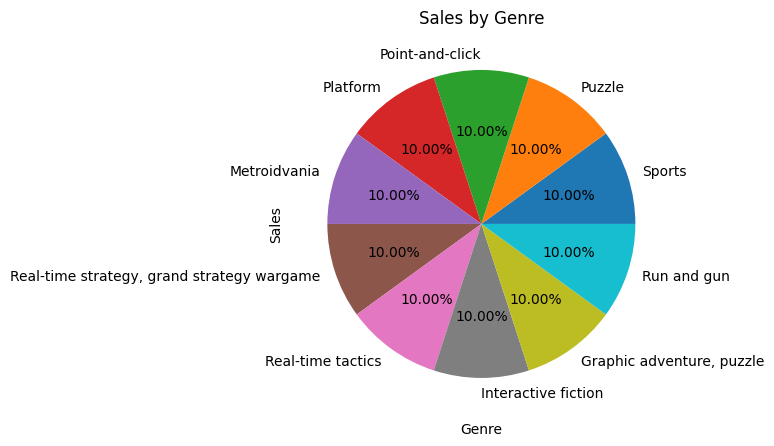

In [18]:
visualize(eda_genre, 'Genre', 'Sales', '', 'Sales by Genre', 'pie')

> Based on this information, it can be concluded that the genre with the highest sales are several.

### Sales by Developer

In [19]:
eda_developer = df.groupby('Developer', as_index=False).agg({'Sales' : 'sum'})
eda_developer.head()

,Developer,Sales
0,3D Realms,1.0
1,Amanita Design,1.0
2,ArenaNet,11.0
3,Arrowhead Game Studios,2.0
4,Ascaron,2.0


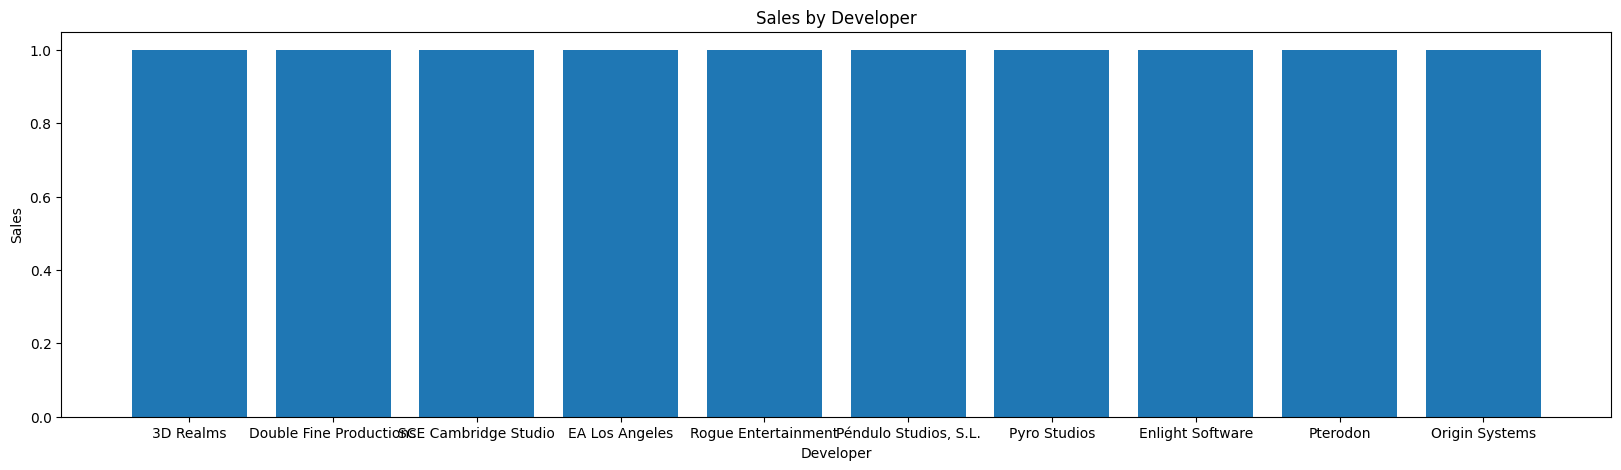

In [20]:
visualize(eda_developer, 'Developer', 'Sales', '', 'Sales by Developer', 'bar')

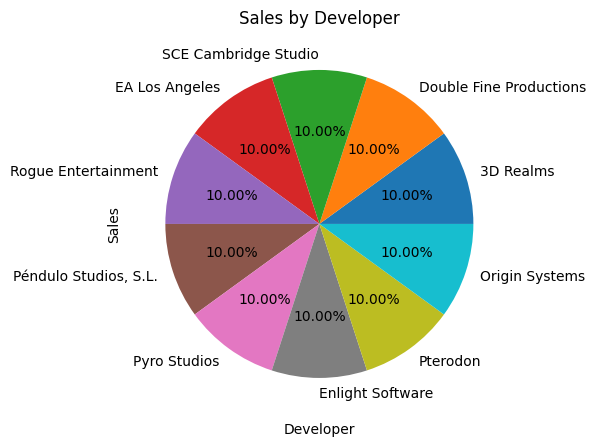

In [21]:
visualize(eda_developer, 'Developer', 'Sales', '', 'Sales by Developer', 'pie')

> Based on this information, it can be concluded that the developer with the highest sales are several.

### Sales by Publisher

In [22]:
eda_publisher = df.groupby('Publisher', as_index=False).agg({'Sales' : 'sum'})
eda_publisher.head()

,Publisher,Sales
0,2K Games,1.0
1,2K Games & Aspyr,11.0
2,Activision,13.5
3,Amanita Design,1.0
4,"Atari, Inc",2.0


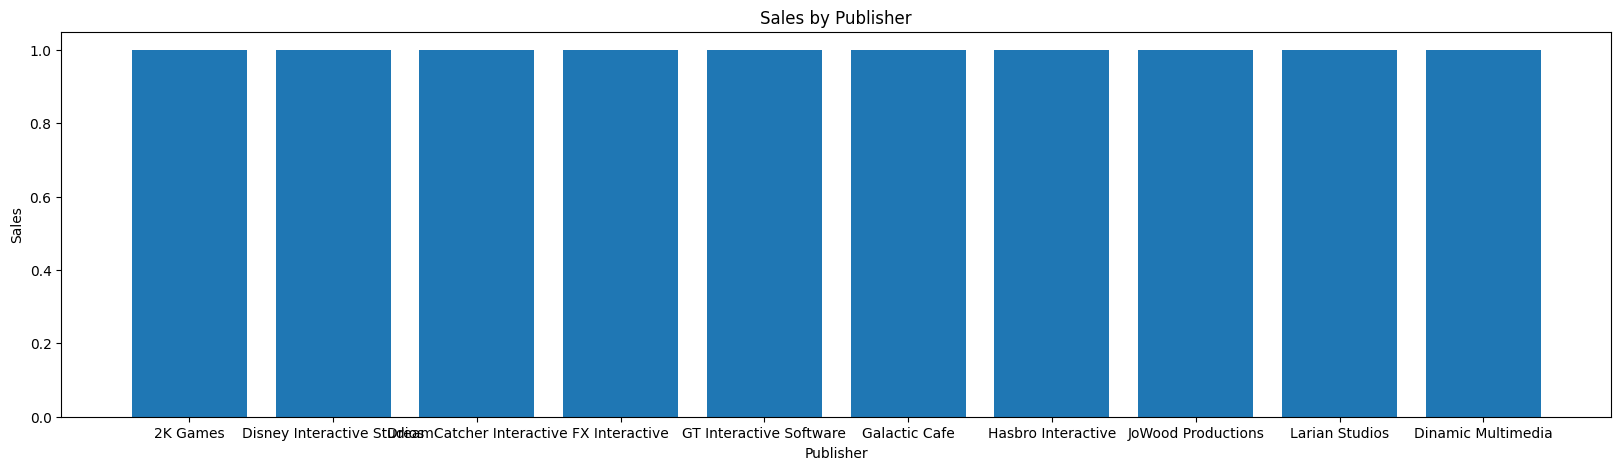

In [23]:
visualize(eda_publisher, 'Publisher', 'Sales', '', 'Sales by Publisher', 'bar')

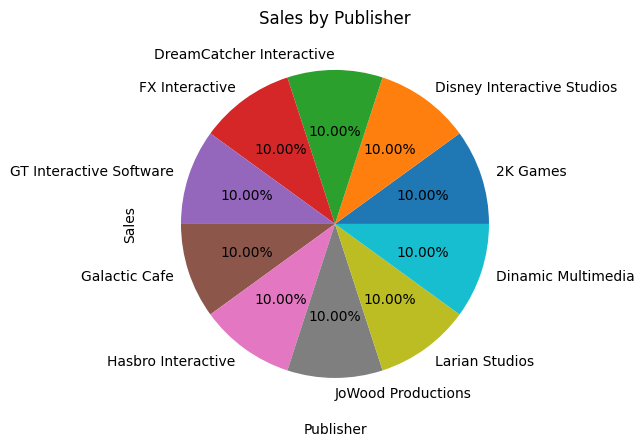

In [24]:
visualize(eda_publisher, 'Publisher', 'Sales', '', 'Sales by Publisher', 'pie')

> Based on this information, it can be concluded that the publisher with the highest sales are several.

## Get the Data ready

In [25]:
df.to_csv('dataset/games_output.csv', index=False)

# Data Visualization

> Data Visualization will be conducted on Looker Studio/Google Data Studio and can be accessed by this link:
https://lookerstudio.google.com/reporting/0ccf627f-aa4d-437d-b42b-fdf3ccabfaa8